# 구글 드라이브 연결

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive

drive.mount('/content/data')

Mounted at /content/data


# [유럽 호텔 리뷰 데이터](https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe)
> 이 데이터세트에는 유럽 전역의 1,493개 고급 호텔에 대한 515,000개의 고객 리뷰와 평점이 포함되어 있습니다. 또한, 추가 분석을 위해 호텔의 지리적 위치도 제공됩니다.

## 데이터 필드(컬럼) 설명

각 필드에 대한 설명은 다음과 같습니다.

- Hotel_Address
  - 호텔 주소.
- Review_Date
  - 리뷰어가 해당 리뷰를 게시한 날짜입니다.
- Average_Score
  - 지난 1년 동안의 최신 코멘트를 기반으로 계산된 호텔의 평균 점수입니다.
- Hotel_Name
  - 호텔 이름
- Reviewer_Nationality
  - 리뷰어의 국적
- Negative_Review
  - 리뷰어가 호텔에 남긴 부정적인 리뷰입니다.
  - 리뷰어가 부정적인 리뷰를 남기지 않은 경우, '부정적 리뷰 없음'으로 표시됩니다.
- Review_Total_Negative_Word_Counts
  - 부정적인 리뷰에 사용된 총 단어 수입니다.
- Positive_Review
  - 리뷰어가 호텔에 남긴 긍정적인 리뷰입니다.
  - 리뷰어가 부정적인 리뷰를 남기지 않은 경우, 'No Positive'로 표시됩니다.
- Review_Total_Positive_Word_Counts
  - 긍정적인 리뷰에 사용된 총 단어 수입니다.
- Reviewer_Score
  - 리뷰어가 호텔에 부여한 점수(리뷰어의 경험에 따른 점수)
- Total_Number_of_Reviews_Reviewer_Has_Given
  - 리뷰어가 과거에 작성한 리뷰 수입니다.
- Total_Number_of_Reviews
  - 호텔이 보유한 유효한 리뷰의 총 수입니다.
- Tags
  - 리뷰어가 호텔에 남긴 태그입니다.
- days_since_review
  - 검토 날짜와 스크래핑 날짜 사이의 기간.
- Additional_Number_of_Scoring
  - 리뷰를 남기지 않고 서비스에 대한 점수만 남긴 고객도 있습니다. 이 수치는 리뷰 없이 유효한 점수가 몇 개나 있는지를 나타냅니다.
- lat
  - 호텔의 위도
- lng
  - 호텔의 경도

# 데이터 로드

In [ ]:
DATA_PATH = "/content/data/MyDrive/ai_lecture/6. Recommendation System/data/515K Hotel Reviews Data in Europe/"

In [ ]:
import pandas as pd

hotel_reviews = pd.read_csv(DATA_PATH+'Hotel_Reviews.csv')

## 데이터 확인

In [ ]:
# shape -> (전체 데이터 수, 전체 컬럼 수)
hotel_reviews.shape

(515738, 17)

In [ ]:
# 데이터 확인
hotel_reviews.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


# 평점 기반 추천

## 단순 인기도 기반 추천 단점
- 리뷰 평균 값을 사용하는 과정에서 빈도를 고려하지 못 하기 때문에 문제가 생김
  - 즉, 5번과 500번의 평가를 받은 두 아이템의 평점이 같은 5점인 경우에 보통은 500번의 평가 점수를 받은 아이템을 더 높게 평가함
- 리뷰 평균 값은 이상치(너무 작은 또는 너무 큰)에 영향을 많이 받는 문제가 생김
  - 5번의 평가 중 4번은 8점을 1번은 0점을 받았다면, 평균은 6.4임.
  - 즉, 대부분의 사람들은 높은 점수를 주었지만, 소수의 사람들에 의해서 전체 결과(평균)이 달라지는 문제가 발생함

`평점 기반 점수를 사용하게 되면 해당 문제를 해결할 수 있음`

## 1.평점 기반 점수 생성하기
- 평점은 점수를 세분화하여 다양한 아이템 간의 비교를 용이하게 한다는 점에서 좋은 지표지만, 평가받은 빈도를 고려하지 못 한다는 단점이 있다.
- 각각 5번과 500번의 평가를 받은 두 아이템의 평점이 같은 5점일 때, 우리는 두 개의 5점을 다르게 받아들일 것이다.

즉 충분히 많은 수의 평가를 받은 아이템에 더 신뢰가 갈 것이다.

### [1-1.Stream Game Algorithm 함수 만들기](https://www.themultiplayergroup.com/news/using-steam-reviews-to-estimate-player-numbers-an-intuitive-method)
  - 리뷰 수가 충분히 많은 경우에는 $2^{-log(reviews)}$의 값이 0으로 수렴하게 되면서 평균 긍정률을 거의 그대로 점수에 반영하게 된다.
  - 하지만 리뷰 수가 적은 경우에는 $2^{-log(reviews)}$에 의해서 점수를 보정하게 된다.
$$
Score = avg rating - (avg rating - 0.5) \cdot 2^{-log(reviews)}
$$
$$
avg rating = { 긍정 리뷰수 \over 전체 리뷰 수 }
$$

In [ ]:
import numpy as np

def stream_game_score(positiveVotes, totalVotes, standard_score=0.5):
    average = positiveVotes / totalVotes
    score = average - ( average - standard_score )*2**(-np.log10(totalVotes + 1))
    return score

### 1-2.긍정 리뷰 점수를 정의하기 위해서 리뷰 점수 통계값 확인
사용해야할 컬럼 리스트

- Hotel_Name
  - 호텔 이름
- Reviewer_Score
  - 리뷰어가 호텔에 부여한 점수(리뷰어의 경험에 따른 점수)

In [ ]:
hotel_reviews['Reviewer_Score'].describe()

,Reviewer_Score
count,515738.000000
mean,8.395077
std,1.637856
min,2.500000
25%,7.500000
50%,8.800000
75%,9.600000
max,10.000000


### 1-3.positiveVotes 생성하기
> 위의 통계값을 바탕으로 8.8(중위값)보다 큰 경우, 긍정리뷰로 정의

In [ ]:
Reviewer_Score_Median = hotel_reviews['Reviewer_Score'].median()

Reviewer_Score_Median

8.8

In [ ]:
hotel_reviews['positiveVotes'] = hotel_reviews['Reviewer_Score'].map(lambda x: x >= Reviewer_Score_Median)

In [ ]:
hotel_reviews[['Hotel_Name', 'Reviewer_Score', 'positiveVotes']].head()

,Hotel_Name,Reviewer_Score,positiveVotes
0,Hotel Arena,2.9,False
1,Hotel Arena,7.5,False
2,Hotel Arena,7.1,False
3,Hotel Arena,3.8,False
4,Hotel Arena,6.7,False


In [ ]:
hotel_reviews[['Hotel_Name', 'Reviewer_Score', 'positiveVotes']].tail()

,Hotel_Name,Reviewer_Score,positiveVotes
515733,Atlantis Hotel Vienna,7.0,False
515734,Atlantis Hotel Vienna,5.8,False
515735,Atlantis Hotel Vienna,2.5,False
515736,Atlantis Hotel Vienna,8.8,True
515737,Atlantis Hotel Vienna,8.3,False


### 1-4.Steam Game Score 생성하기

> 파이썬에서 True는 1 / False는 0으로 표현됨  
> 따라서 sum(전체의 합)이란 True의 갯수 라고 해석할 수 있음

```python
# 호텔별
hotel_reviews.groupby(['Hotel_Name'])\
  # count(리뷰 수), sum(긍정 리뷰 수)
  .agg({'Reviewer_Score':'count', 'positiveVotes':'sum'}).reset_index()

```

In [ ]:
reviews_by_hotel = hotel_reviews.groupby(['Hotel_Name'])\
  .agg({'Reviewer_Score':'count', 'positiveVotes':'sum'})\
  .reset_index()

reviews_by_hotel.head()

,Hotel_Name,Reviewer_Score,positiveVotes
0,11 Cadogan Gardens,159,112
1,1K Hotel,148,57
2,25hours Hotel beim MuseumsQuartier,689,508
3,41,103,98
4,45 Park Lane Dorchester Collection,28,25


In [ ]:
reviews_by_hotel['stream_game_score'] = reviews_by_hotel.apply(
  lambda row: stream_game_score(row['positiveVotes'], row['Reviewer_Score']), axis=1
)

reviews_by_hotel.head()

,Hotel_Name,Reviewer_Score,positiveVotes,stream_game_score
0,11 Cadogan Gardens,159,112,0.660044
1,1K Hotel,148,57,0.410603
2,25hours Hotel beim MuseumsQuartier,689,508,0.704132
3,41,103,98,0.839917
4,45 Park Lane Dorchester Collection,28,25,0.750293


## 2.평점 기반 추천하기

In [ ]:
no_ranking = 5 # 추천 수량

reviews_by_hotel.sort_values(by=['stream_game_score'], ascending=False)[:no_ranking]

,Hotel_Name,Reviewer_Score,positiveVotes,stream_game_score
598,Hotel Casa Camper,301,296,0.896744
481,H10 Casa Mimosa 4 Sup,116,114,0.867640
836,Intercontinental London The O2,2551,2280,0.856642
1396,The Soho Hotel,157,150,0.856206
771,Hotel The Serras,213,200,0.851689


## 3.조회 수 기반 점수 생성하기
- 목적(Hacker News Algorithm)
  - 오래됐지만 좋아요가 많은 게시물이 무조건 상단에 고정되지 않게 하여 정보의 신선도 유지
  - 반대로 시간은 조금 지났지만 빠르게 인기 있는 콘텐츠는 빠르게 상단 노출

> 조회 수 기반 함수 생성하기

In [ ]:
def hacker_news_score(pageviews, age, gravity=1.8):
  return (pageviews - 1) / pow((age+2), gravity)

> pageviews는 전체 리뷰 수 임으로, Reviewer_Score(전체 리뷰 수)와 같은 뜻이다.

In [ ]:
# 컬럼명 변경
reviews_by_hotel.rename(columns={
  'Reviewer_Score':'pageviews'
}, inplace=True)

reviews_by_hotel.head()

,Hotel_Name,pageviews,positiveVotes,stream_game_score
0,11 Cadogan Gardens,159,112,0.660044
1,1K Hotel,148,57,0.410603
2,25hours Hotel beim MuseumsQuartier,689,508,0.704132
3,41,103,98,0.839917
4,45 Park Lane Dorchester Collection,28,25,0.750293


> age(얼마나 오래되었는지) 구하기

In [ ]:
# 문자열을 숫자로 변환
hotel_reviews['number_days_since_review'] = hotel_reviews['days_since_review']\
                                      .map(lambda x: int(x.replace('days','').replace('day','').replace(' ','')))

# 호텔별 평균 리뷰 작성일 생성
age_by_hotel = hotel_reviews.groupby(['Hotel_Name'])\
  .agg({'number_days_since_review':'mean'}).reset_index()

# 컬럼명 변경
age_by_hotel.rename(columns={'number_days_since_review':'age'}, inplace=True)

age_by_hotel.head()

,Hotel_Name,age
0,11 Cadogan Gardens,318.754717
1,1K Hotel,365.567568
2,25hours Hotel beim MuseumsQuartier,411.343977
3,41,408.145631
4,45 Park Lane Dorchester Collection,340.107143


> 조회 수 기반 점수 생성하기

In [ ]:
# age 데이터 추가하기
reviews_by_hotel = reviews_by_hotel.merge(age_by_hotel, on=['Hotel_Name'])

# 조회 수 기반 점수 생성하기
reviews_by_hotel['hacker_news_score'] = reviews_by_hotel.apply(
  lambda row: hacker_news_score(row['pageviews'], row['age']), axis=1
)

reviews_by_hotel.head()

,Hotel_Name,pageviews,positiveVotes,stream_game_score,age,hacker_news_score
0,11 Cadogan Gardens,159,112,0.660044,318.754717,0.004870
1,1K Hotel,148,57,0.410603,365.567568,0.003546
2,25hours Hotel beim MuseumsQuartier,689,508,0.704132,411.343977,0.013435
3,41,103,98,0.839917,408.145631,0.002020
4,45 Park Lane Dorchester Collection,28,25,0.750293,340.107143,0.000741


## 4.생성된 평점 점수와 조회 점수 확인 및 정규성

### 데이터 분포 확인

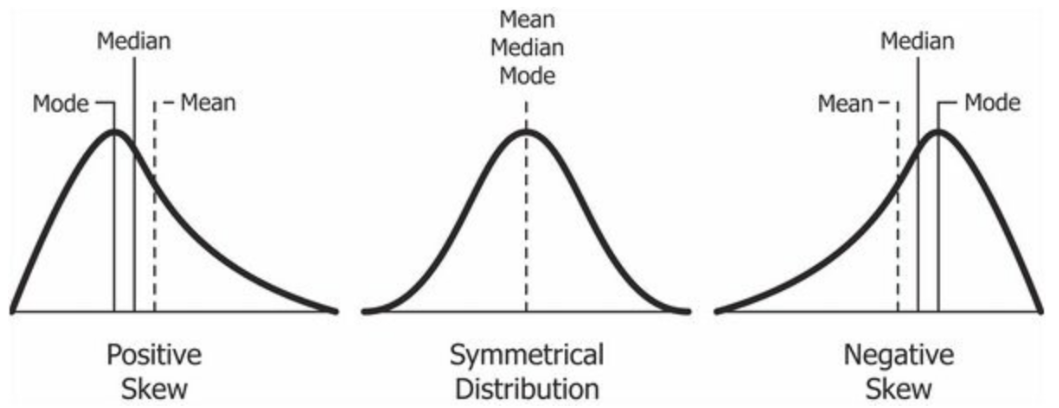

- 통계함수(describe())의 값을 통해 heacker_news_score가 한쪽으로 비대칭하게 분포되어 있다는 것을 간접적으로 알 수 있습니다.
- heacker_news_score에서 중위값이 평균값보다 많이 작기 때문에 왼쪽으로 치우쳐진(Positive Skew) 그래프가 예상됩니다.

In [ ]:
reviews_by_hotel[['stream_game_score', 'hacker_news_score']].describe()

,stream_game_score,hacker_news_score
count,1492.000000,1492.000000
mean,0.571712,0.010604
std,0.136974,0.017696
min,0.163707,0.000146
25%,0.474192,0.002632
50%,0.571593,0.005687
75%,0.675356,0.011947
max,0.896744,0.344187


- 그래프를 통해서도 알 수 있듯이 stream_game_score는 비교적 정규분포표와 비슷하도고 판단할 수 있다.

<Axes: ylabel='Count'>

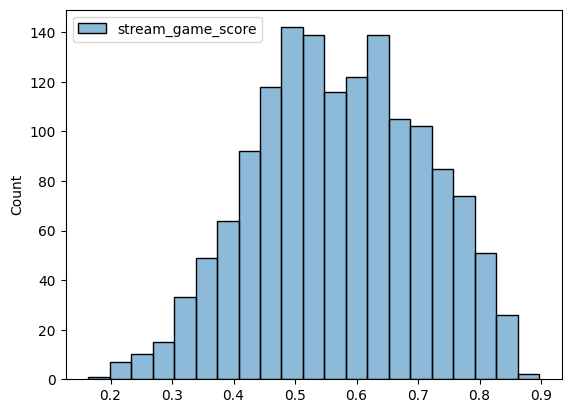

In [ ]:
import seaborn as sns

sns.histplot(reviews_by_hotel[['stream_game_score']])

- 아래 그래프를 통해서 우리는 hacker_news_score는 왼쪽으로 데이터들이 몰려있다는 것을 확인할 수 있습니다.

<Axes: ylabel='Count'>

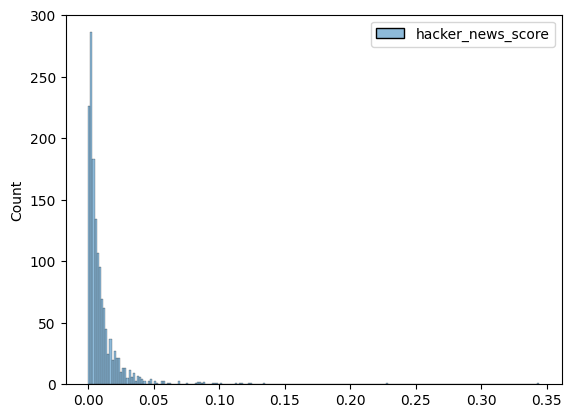

In [ ]:
sns.histplot(reviews_by_hotel[['hacker_news_score']])

### 정규성 변환
- 정규성 변환이란, 데이터 분포를 **정규분포(가우시안 분포)**에 가깝게 만들기 위한 변환
- 목적은 주로 왜도(skewness) 해소 및 통계 분석이나 머신러닝 모델 성능 향상
- 보통 로그 변환(np.log, np.log10, np.log1p)을 통해 정규성 변환 진행

In [ ]:
import numpy as np

reviews_by_hotel['hacker_news_score_log'] = np.log(reviews_by_hotel['hacker_news_score'])

reviews_by_hotel[['hacker_news_score_log', 'hacker_news_score']].describe()

,hacker_news_score_log,hacker_news_score
count,1492.000000,1492.000000
mean,-5.189298,0.010604
std,1.131428,0.017696
min,-8.829138,0.000146
25%,-5.940161,0.002632
50%,-5.169580,0.005687
75%,-4.427244,0.011947
max,-1.066570,0.344187


- 로그변환을 통해 정규분포 형태로 데이터가 변환된 것을 확인함

<Axes: ylabel='Count'>

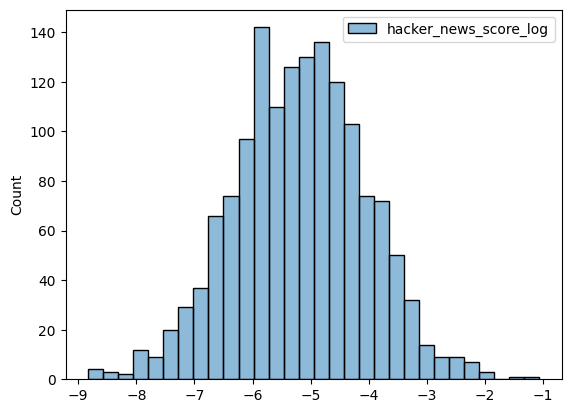

In [ ]:
sns.histplot(reviews_by_hotel[['hacker_news_score_log']])

## 5.조회 수 기반 평점과 평점 기반 평점이 적용된 Score 생성하기

### 정규화 진행
- 아래와 같이, 각 평점들의 점수들의 분포가 서로 다르기 때문에 정규화를 진행함
- MinMax Scaling을 통해 각 평점들을 정규화 진행

In [ ]:
reviews_by_hotel[['hacker_news_score_log', 'stream_game_score']].describe()

,hacker_news_score_log,stream_game_score
count,1492.000000,1492.000000
mean,-5.189298,0.571712
std,1.131428,0.136974
min,-8.829138,0.163707
25%,-5.940161,0.474192
50%,-5.169580,0.571593
75%,-4.427244,0.675356
max,-1.066570,0.896744


> minmax scaling 함수 생성하기

In [ ]:
def minmax_scaling(data, min, max):
  scale = max - min
  return (data - min) / scale

> hacker_news_score를 스케일링 적용하기

In [ ]:
# 최소값
hacker_min = reviews_by_hotel['hacker_news_score_log'].min()
# 최대값
hacker_max = reviews_by_hotel['hacker_news_score_log'].max()

# 스케일링 적용
reviews_by_hotel['scaled_hacker_news_score'] = reviews_by_hotel['hacker_news_score_log'].map(
  lambda x: minmax_scaling(x, hacker_min, hacker_max)
)

reviews_by_hotel[['hacker_news_score_log', 'scaled_hacker_news_score']].describe()

,hacker_news_score_log,scaled_hacker_news_score
count,1492.000000,1492.000000
mean,-5.189298,0.468896
std,1.131428,0.145754
min,-8.829138,0.000000
25%,-5.940161,0.372168
50%,-5.169580,0.471436
75%,-4.427244,0.567067
max,-1.066570,1.000000


> stream_game_score를 스케일링 적용하기

In [ ]:
# 최소값
stream_min = reviews_by_hotel['stream_game_score'].min()
# 최대값
stream_max = reviews_by_hotel['stream_game_score'].max()

# 스케일링 적용
reviews_by_hotel['scaled_stream_game_score'] = reviews_by_hotel['stream_game_score'].map(
  lambda x: minmax_scaling(x, stream_min, stream_max)
)

reviews_by_hotel[['stream_game_score', 'scaled_stream_game_score']].describe()

,stream_game_score,scaled_stream_game_score
count,1492.000000,1492.000000
mean,0.571712,0.556594
std,0.136974,0.186858
min,0.163707,0.000000
25%,0.474192,0.423560
50%,0.571593,0.556433
75%,0.675356,0.697984
max,0.896744,1.000000


> 정규화 결과 확인

In [ ]:
reviews_by_hotel[['scaled_hacker_news_score', 'scaled_stream_game_score']].describe()

,scaled_hacker_news_score,scaled_stream_game_score
count,1492.000000,1492.000000
mean,0.468896,0.556594
std,0.145754,0.186858
min,0.000000,0.000000
25%,0.372168,0.423560
50%,0.471436,0.556433
75%,0.567067,0.697984
max,1.000000,1.000000


### Score 생성

In [ ]:
stream_weight = 1.0
hacker_weight = 0.8

reviews_by_hotel['score'] = reviews_by_hotel.apply(
  # 항목별 중요도(weight)를 적용함
  lambda row: row['scaled_hacker_news_score']*hacker_weight + row['scaled_stream_game_score']*stream_weight,
  axis=1
)

# 결과 확인하기
reviews_by_hotel[['Hotel_Name', 'score', 'scaled_hacker_news_score', 'scaled_stream_game_score']].head()

,Hotel_Name,score,scaled_hacker_news_score,scaled_stream_game_score
0,11 Cadogan Gardens,1.038267,0.451463,0.677096
1,1K Hotel,0.665274,0.410578,0.336812
2,25hours Hotel beim MuseumsQuartier,1.202986,0.582181,0.737241
3,41,1.192943,0.338083,0.922477
4,45 Park Lane Dorchester Collection,0.967349,0.208919,0.800213


# 추천하기

In [ ]:
no_ranking = 5 # 추천 수량

reviews_by_hotel.sort_values(by=['score'], ascending=False)\
  [['Hotel_Name', 'score']]\
  [:no_ranking]

,Hotel_Name,score
1374,The Ned,1.618692
836,Intercontinental London The O2,1.615039
1489,citizenM Tower of London,1.512397
1031,Montcalm Royal London House City of London,1.478940
481,H10 Casa Mimosa 4 Sup,1.454687
